In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# **Exploratory Data Anlaysis**

## STEP 1 : Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## STEP 2 : Loading the dataset

In [3]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

## STEP 3 : Understand the Data

In [4]:
print("Total Entries:", df.shape[0])
print("Total number of features:", df.shape[1])
print("Columns:",df.columns)

Total Entries: 569
Total number of features: 33
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# Using .info() to examine the data types and the number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Using .describe() to get a summary of numeric columns (mean, min, max, standard deviation).
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## STEP 4 : Identify Missing Values

In [8]:
print("Missing values:")
df.isnull().sum()

Missing values:


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
print("Total Missing Values Count:")
df.isnull().sum().sum()

Total Missing Values Count:


569

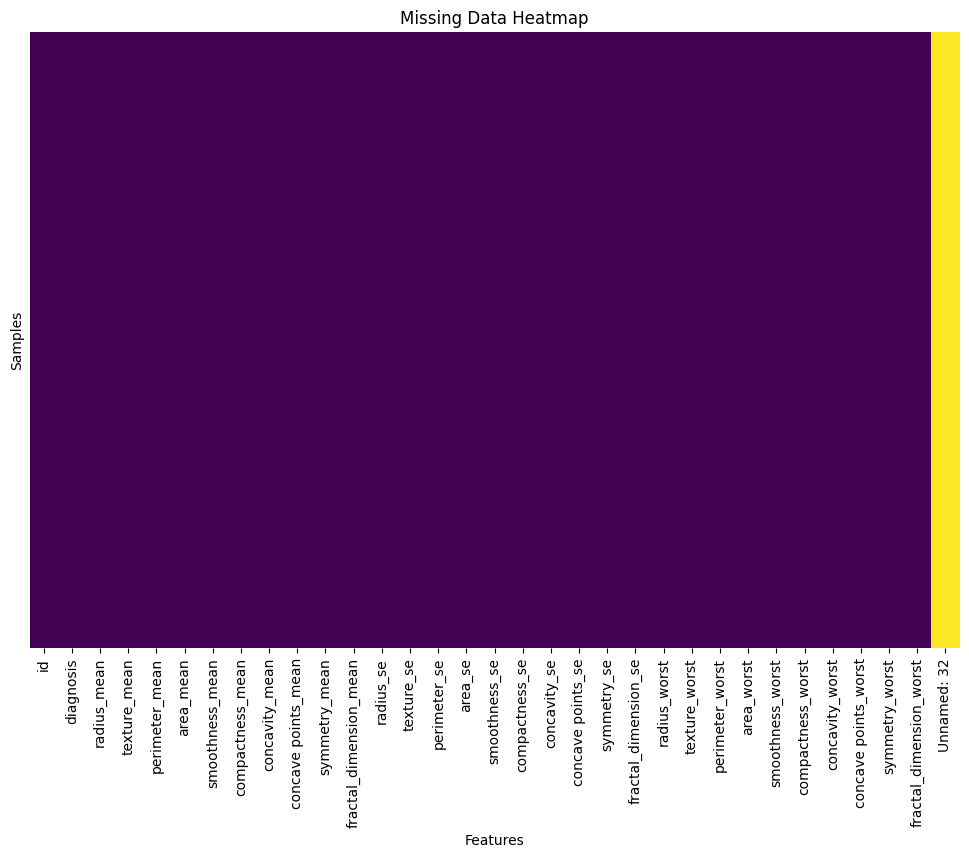

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

## STEP 5 : Data Cleansing
Check for Inconsistent or Faulty Data

In [11]:
# Examine categorical columns (diagnosis) for typos or inconsistent values
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

## STEP 6 : Drop Irrelevant Columns

In [12]:
# removing the unwanted column
df.drop(columns='id',axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## STEP 7 : Explore Distributions

In [13]:
# Exploring the distribution of categorical variables (e.g. diagnosis).
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## STEP 8 : Encode Categorical Variables

In [15]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## STEP 9 : Grouped aggregations (by category)

In [16]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


## STEP 10 : Categorical Analysis

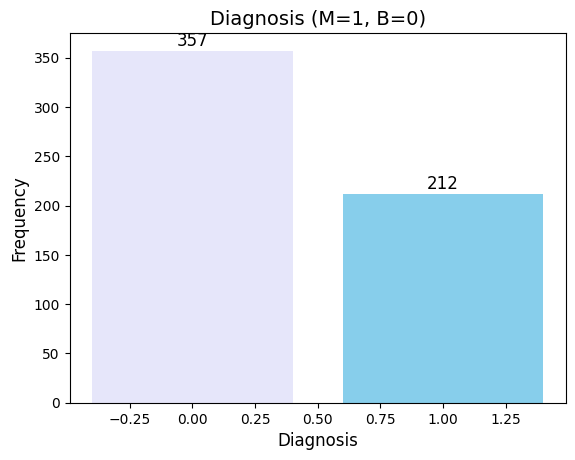

In [17]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['lavender', 'skyblue'])

# Add text labels
for i, value in enumerate(diagnosis_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

# Customize plot
plt.title('Diagnosis (M=1, B=0)', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show() 

## STEP 11 : Correlation Analysis

In [18]:
matrix=df.corr()

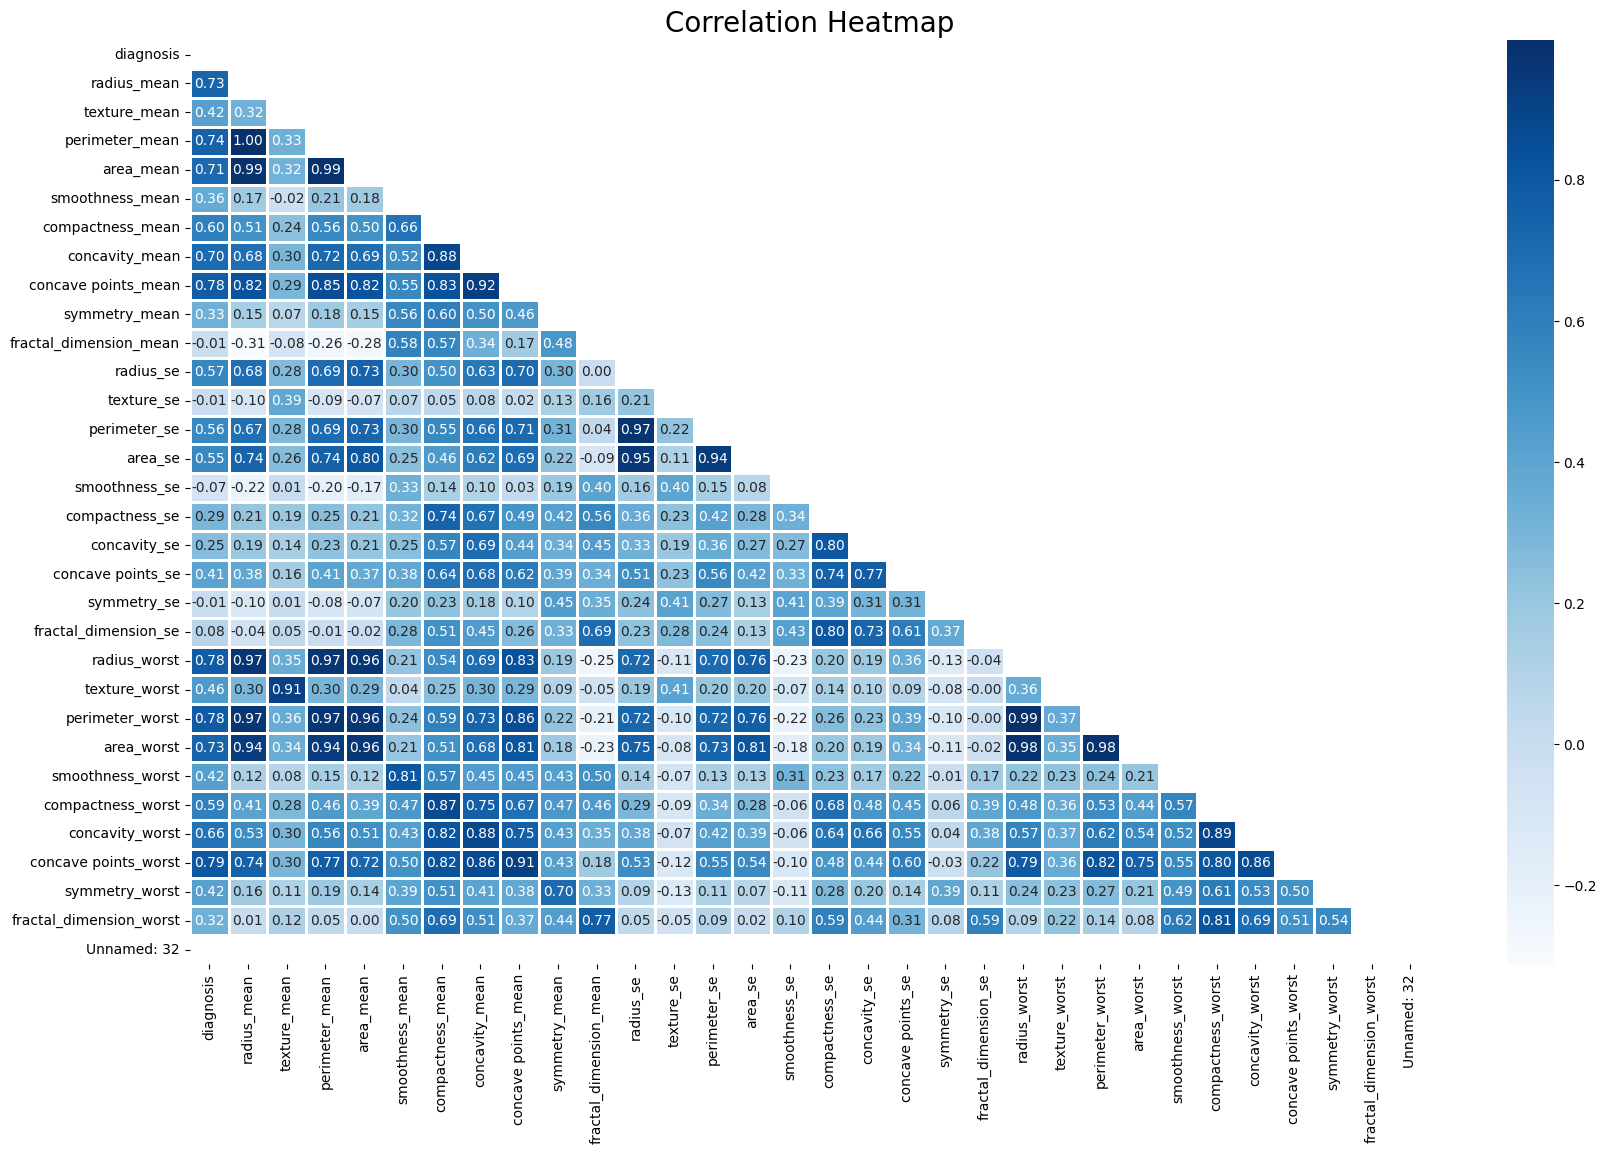

In [19]:
plt.figure(figsize=(20, 12))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(matrix , dtype=bool))

# Create the heatmap
sns.heatmap(matrix, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap='Blues')

# Show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

## STEP 12 : Outlier detection


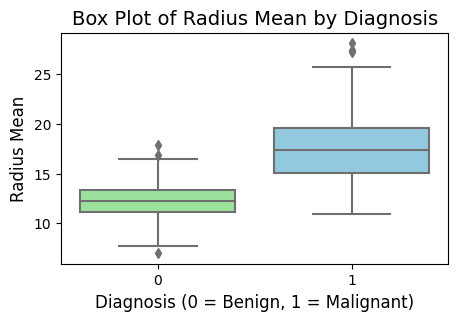

In [20]:
# IMPACT OF RADIUS MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='radius_mean', data=df,palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Radius Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Radius Mean', fontsize=12)
plt.show()


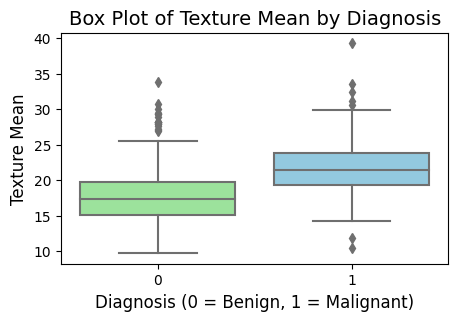

In [21]:
# IMPACT OF TEXTURE ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='texture_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Texture Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Texture Mean', fontsize=12)
plt.show()


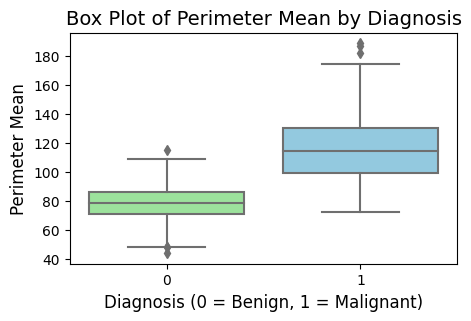

In [22]:
# IMPACT OF PERIMETER ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='perimeter_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Perimeter Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Perimeter Mean', fontsize=12)
plt.show()


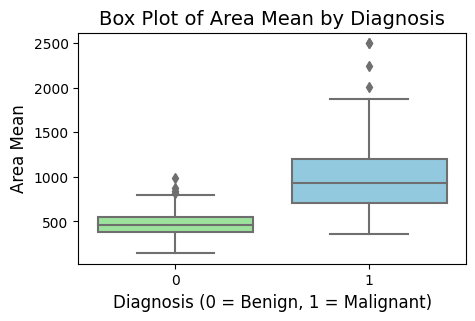

In [23]:
# IMPACT OF AREA MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='area_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Area Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Area Mean', fontsize=12)
plt.show()


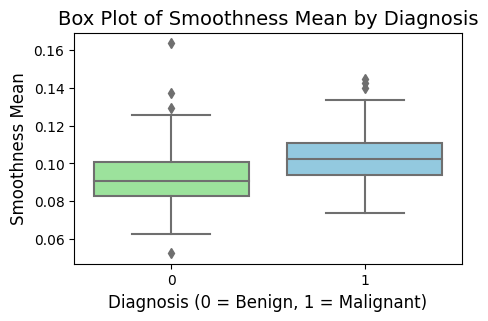

In [24]:
# IMPACT OF SMOOTHNESS MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='smoothness_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Smoothness Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Smoothness Mean', fontsize=12)
plt.show()


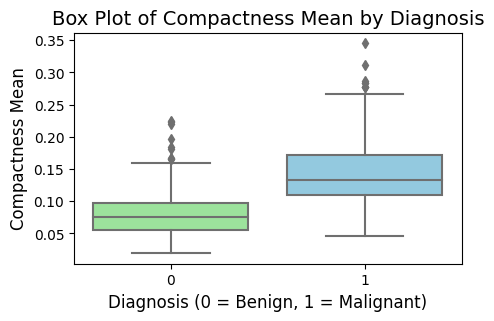

In [25]:
# IMPACT OF COMPACTNESS MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='compactness_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Compactness Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Compactness Mean', fontsize=12)
plt.show()


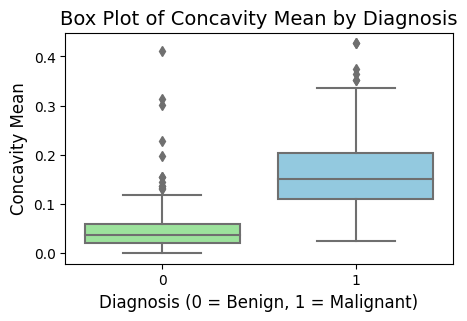

In [26]:
# IMPACT OF CONCAVITY MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='concavity_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Concavity Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Concavity Mean', fontsize=12)
plt.show()


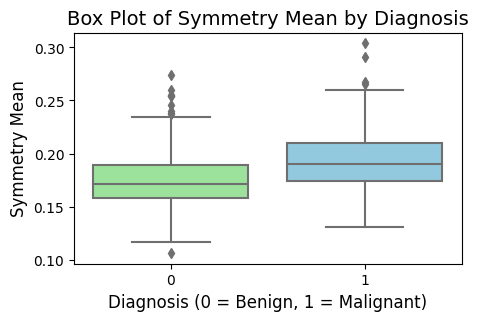

In [27]:
# IMPACT OF SYMMETRY MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='symmetry_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Symmetry Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Symmetry Mean', fontsize=12)
plt.show()


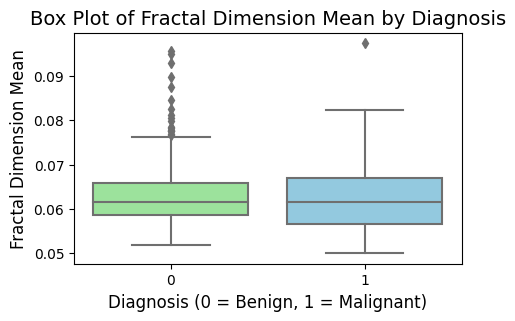

In [28]:
# IMPACT OF FRACTAL DIMENSION MEAN ON TUMOR TYPE
plt.figure(figsize=(5,3))

sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=df, palette=['lightgreen', 'skyblue'])

plt.title('Box Plot of Fractal Dimension Mean by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Fractal Dimension Mean', fontsize=12)
plt.show()


## STEP 13 : Feature Distribution Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

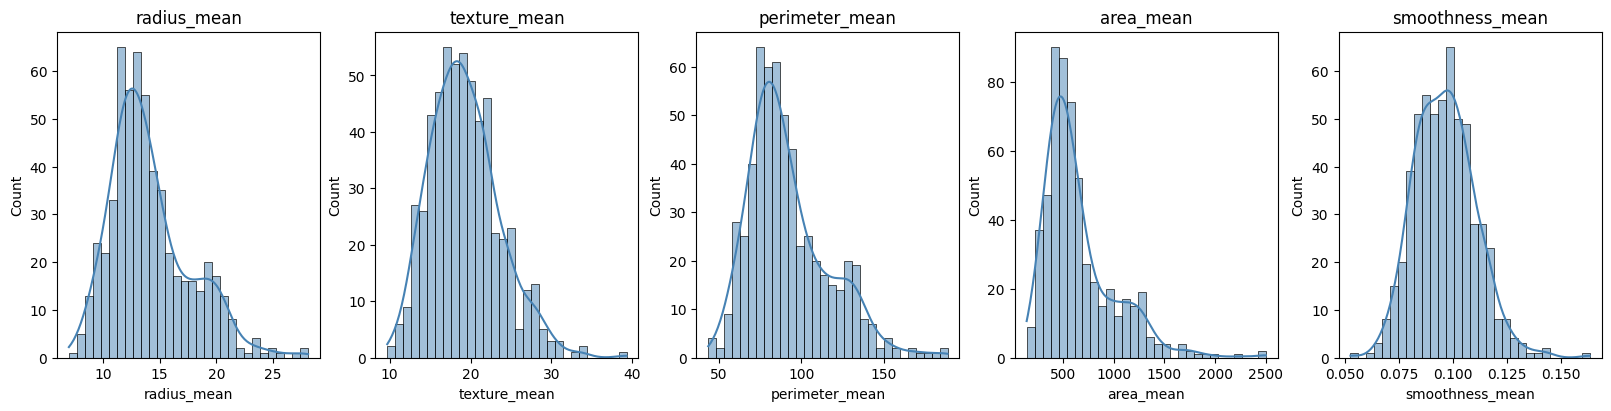

In [29]:
columns_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4), constrained_layout=True)
for ax, column in zip(axes, columns_to_plot):
    sns.histplot(data=df, x=column, kde=True, ax=ax, color='steelblue', bins=30)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

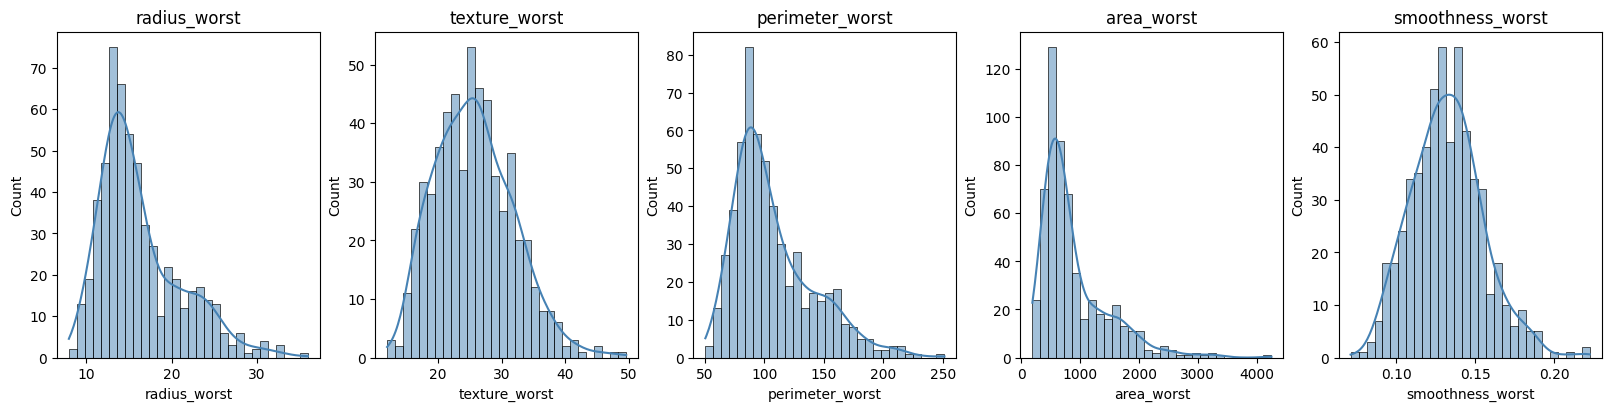

In [30]:
columns_to_plot = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4), constrained_layout=True)
for ax, column in zip(axes, columns_to_plot):
    sns.histplot(data=df, x=column, kde=True, ax=ax, color='steelblue', bins=30)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()


## STEP 14 : PairWise Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

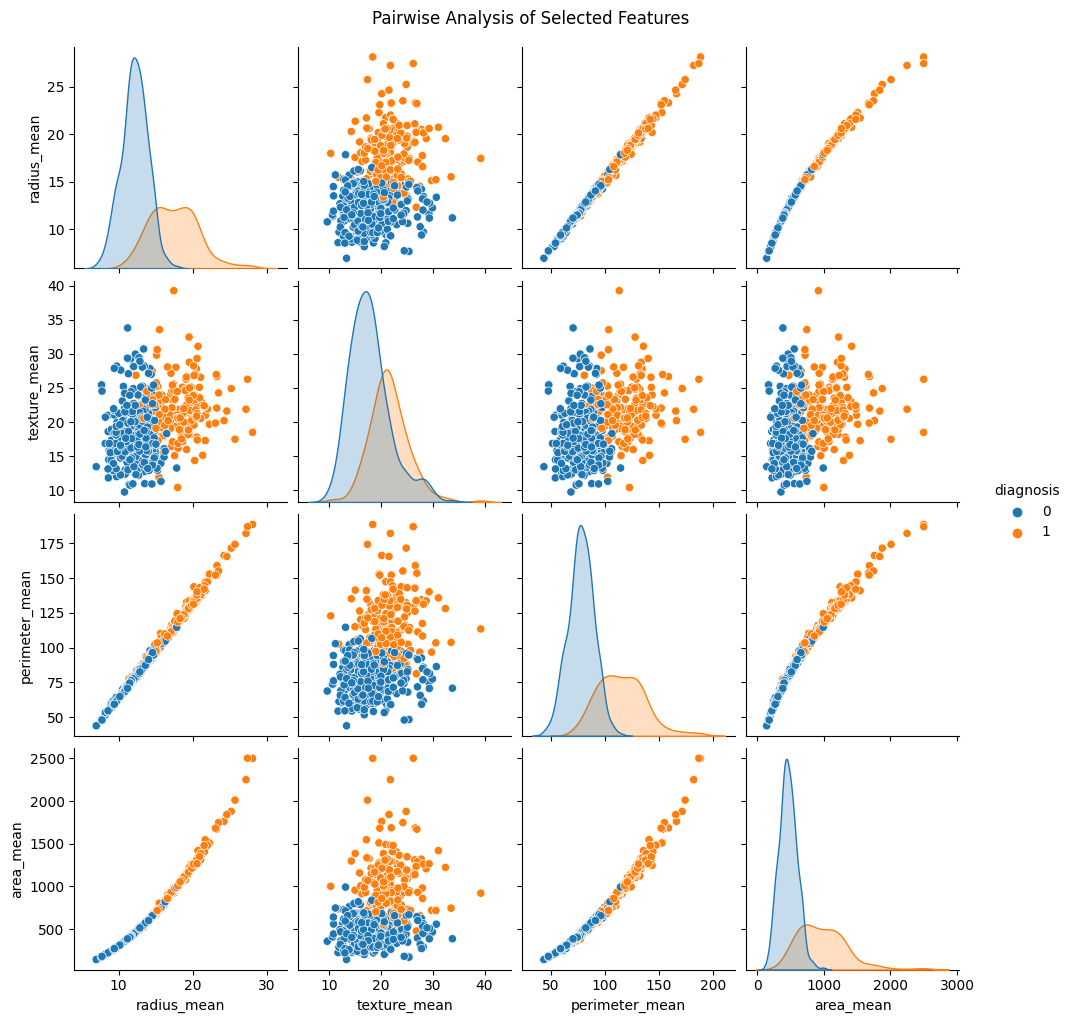

In [31]:
sns.pairplot(df, hue='diagnosis', diag_kind='kde', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.suptitle('Pairwise Analysis of Selected Features', y=1.02)
plt.show()

# Data Preprocessing

## STEP 1 : Handling Missing Values

In [32]:
if 'Unnamed: 32' in df.columns:
    df.drop(columns='Unnamed: 32', inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## STEP 2 : Separate Features and Target Variable

In [33]:
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target variable
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## STEP 3 : Feature Selection

In [34]:
corr_matrix = X.corr().abs()

threshold = 0.9

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
high_corr_features = [column for column in tri_df.columns if any(tri_df[column] > threshold)]

X_reduced = X.drop(columns=high_corr_features)

print("Number of features after dropping highly correlated features:", X_reduced.shape[1])

Number of features after dropping highly correlated features: 20


## STEP 4: Split the Dataset into Training and Testing Sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

## STEP 5 : Scale the Features

In [36]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_reduced.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_reduced.columns)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (455, 20)
Testing set shape: (114, 20)


# Machine Learning Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## STEP 1 : Train the Logistic Regression Model

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## STEP 2: Make Predictions

In [39]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## STEP 3: Evaluate the Model's Performance

In [40]:
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy*100)
print("Train Accuracy:", train_accuracy*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 96.49122807017544
Train Accuracy: 95.16483516483515
Confusion Matrix:
 [[64  3]
 [ 1 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## STEP 4 : Confusion Matrix

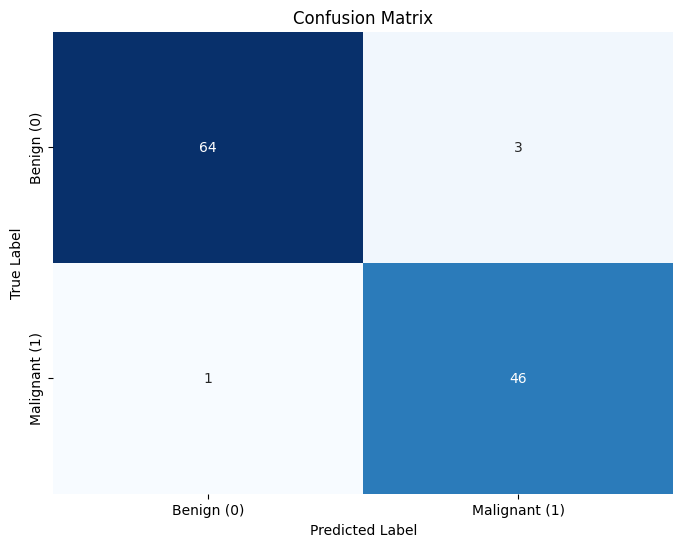

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()